In [20]:
from glob import glob
import pandas as pd
from kid_readout.analysis import resonator, plot_resonator
from notebooks.library import display
display.hide_code()

In [2]:
def load_s2p_re_im(filename):
    f_GHz, S11RE, S11IM, S21RE, S21IM, S12RE, S12IM, S22RE, S22IM = np.loadtxt(filename, unpack=True, skiprows=23)
    
    df = pd.DataFrame.from_dict({'f': 1e9 * f_GHz,
                                 's11': S11RE + 1j * S11IM,
                                 's21': S21RE + 1j * S21IM,
                                 's12': S12RE + 1j * S12IM,
                                 's22': S22RE + 1j * S22IM})
    return df

In [3]:
directory = '/Users/daniel/Johnson+Miller/mkid/multichroic/starcryo/160105/coupling/'

In [4]:
files = glob(directory + '2016-01-19_????_MHz.s2p')

In [5]:
dfs = [load_s2p_re_im(f) for f in files]

In [6]:
rs = []
offset = 0.2e-3
for df in dfs:
    f_center = df.f.mean()
    mask = np.array((f_center * (1 - offset) < df.f) & (df.f < f_center * (1 + offset)))
    rs.append(resonator.Resonator(np.array(df.f)[mask], np.array(df.s21)[mask]))

In [15]:
rs = []
offsets = 7 * [0.5e-3]
for df, offset in zip(dfs, offsets):
    f_center = df.f.mean()
    mask = np.array((f_center * (1 - offset) < df.f) & (df.f < f_center * (1 + offset)))
    rs.append(resonator.Resonator(np.array(df.f)[mask], np.array(df.s21)[mask]))

# Raw sweeps

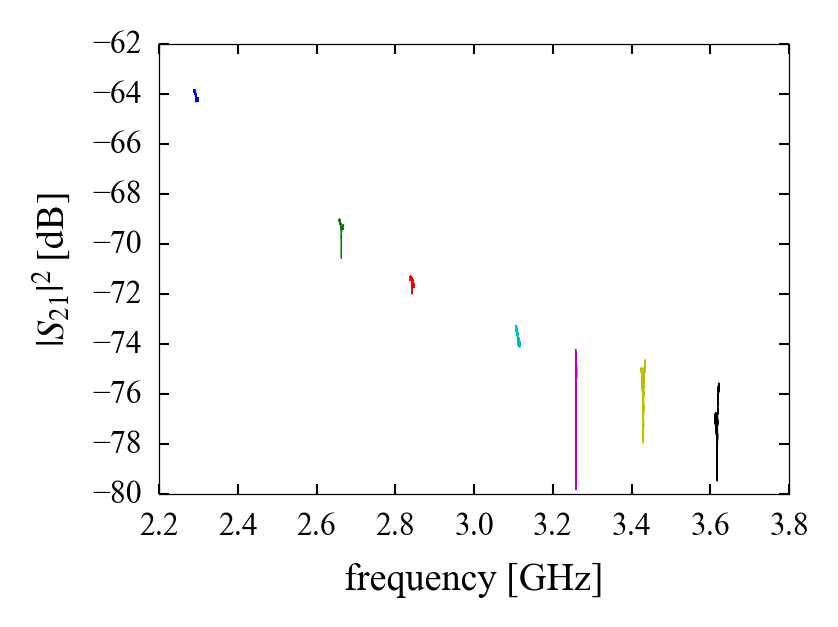

In [16]:
fig, ax = plt.subplots()

for df in dfs:
    ax.plot(1e-9 * df.f,
            20 * np.log10(np.abs(df.s21)))

ax.set_xlabel('frequency [GHz]')
ax.set_ylabel(r'$|S_{21}|^2 \; [\mathrm{dB}]$');

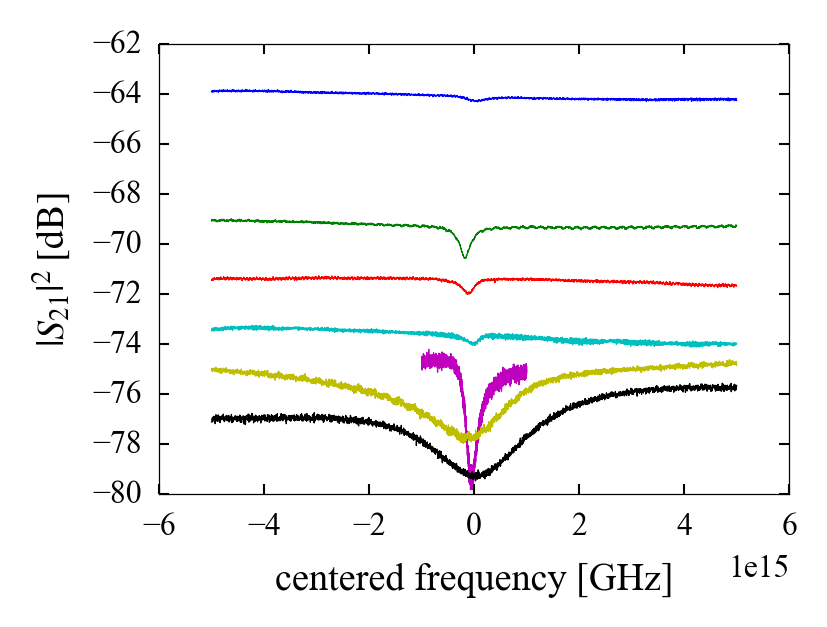

In [17]:
fig, ax = plt.subplots()

for df in dfs:
    ax.plot(1e9 * (df.f - df.f.mean()),
            20 * np.log10(np.abs(df.s21)))

ax.set_xlabel('centered frequency [GHz]')
ax.set_ylabel(r'$|S_{21}|^2 \; [\mathrm{dB}]$');

# Resonator fits

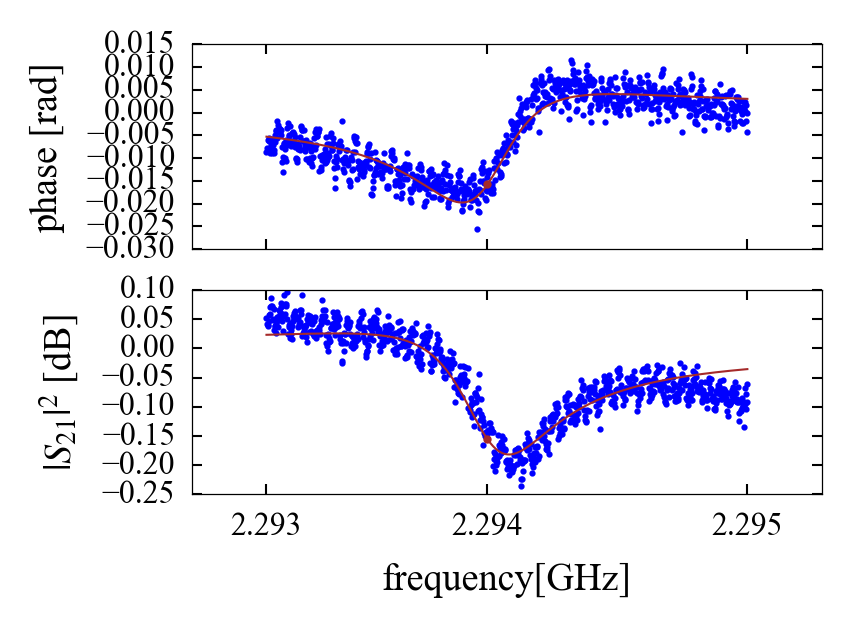

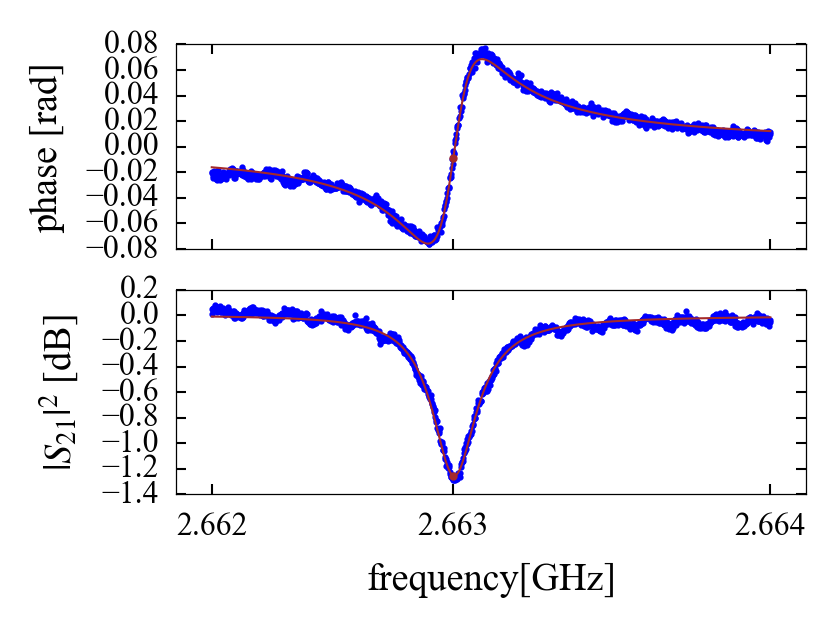

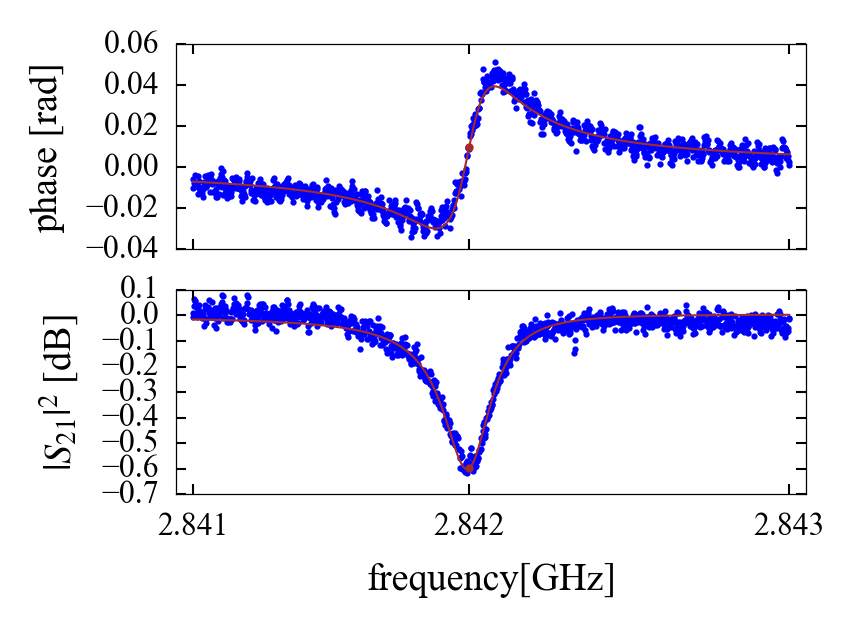

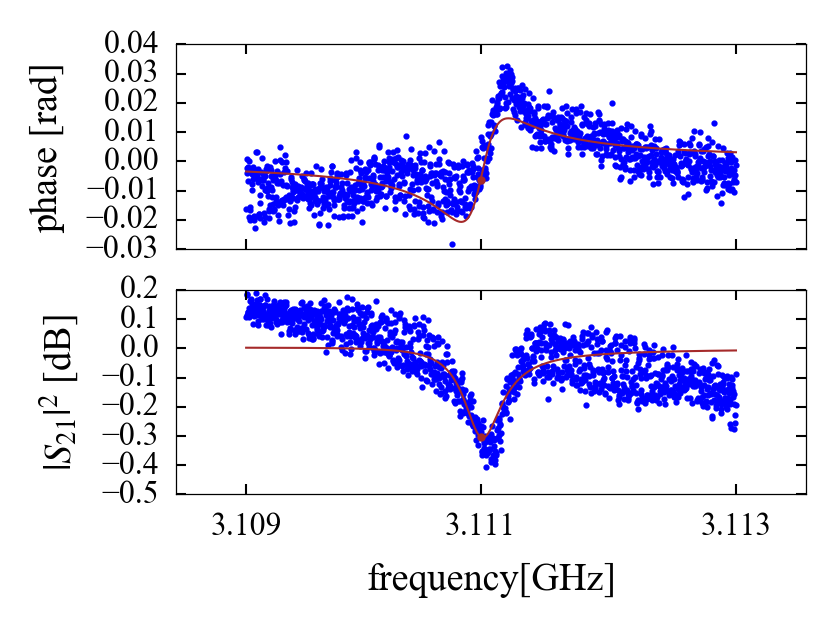

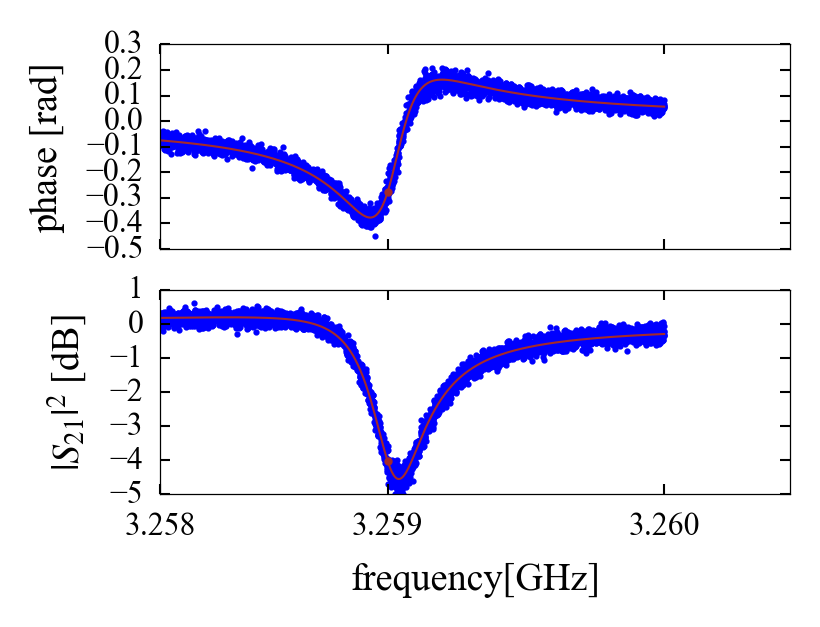

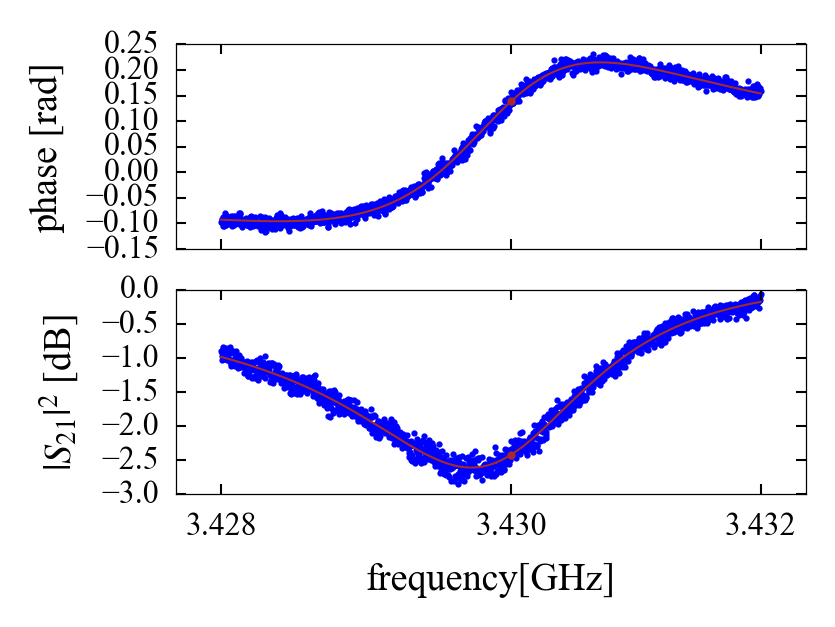

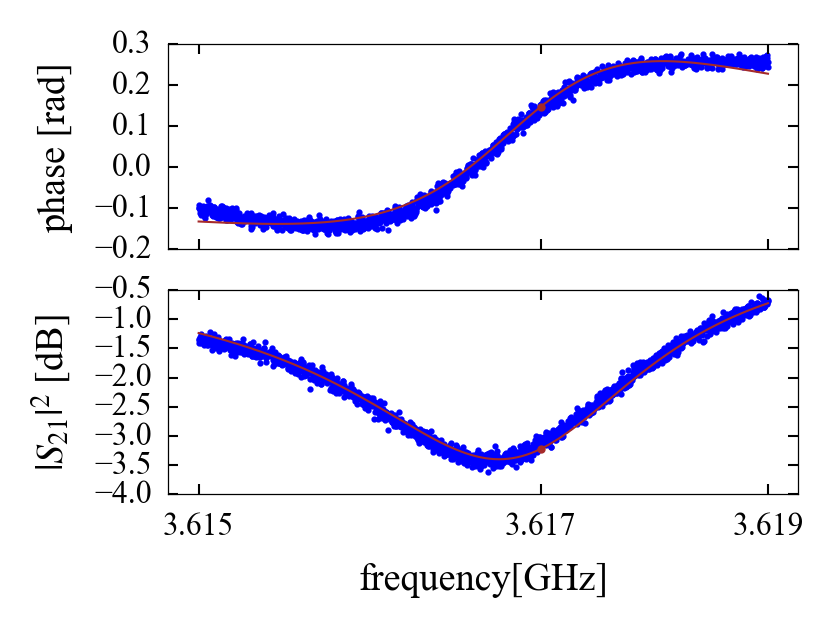

In [18]:
for r in rs:
    plot_resonator.amplitude_and_phase(r, normalize_s21=True, freq_scale=1e-9, xlabel='frequency[GHz]')

# Quality factors

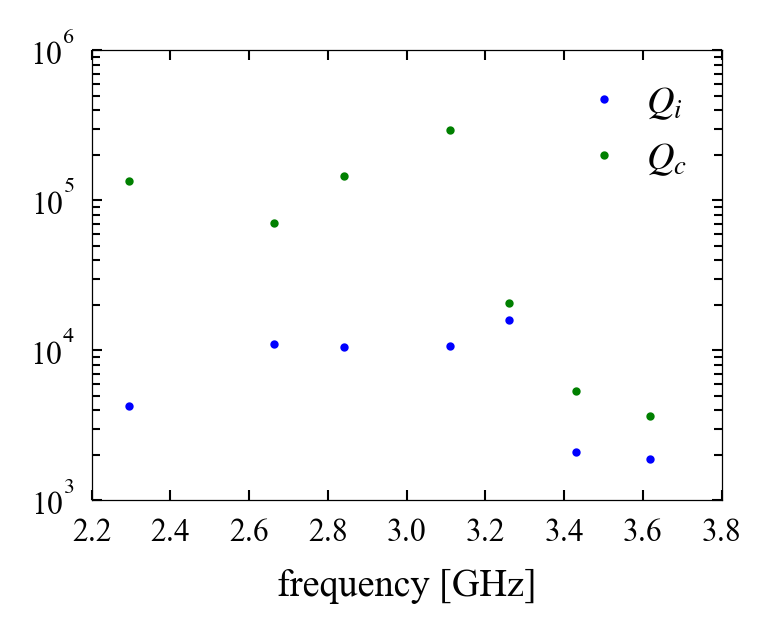

In [19]:
fig, ax = plt.subplots()

for r in rs:
    ax.plot(1e-9 * r.f_0, r.Q_i, '.b', label='$Q_i$')
    ax.plot(1e-9 * r.f_0, r.Q_e_real, '.g', label='$Q_c$')
#    ax.plot(1e-9 * r.f_0, abs(r.Q_e_imag), '.r')

ax.set_yscale('log')
ax.set_xlabel('frequency [GHz]')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='best');
